In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [18]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

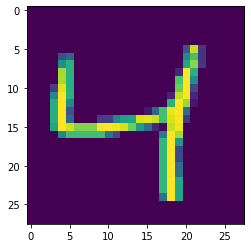

In [19]:
import matplotlib.pyplot as pyp 
pyp.imshow(x_train[2])

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
x_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam")

In [26]:
model.fit(x_train,y_train,epochs=100)

2022-11-25 12:50:13.397491: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2585
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0453
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0275
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220
Epoch 9/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0200
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149
Epoch 11/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0140
Epoch 12/100
1875/1875 [==============================] - 5s 2ms/step - lo

In [27]:
pred = model.predict(x_test)

In [28]:
y_pred = pred.argmax(axis=1)

In [29]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9806